# **(EDA)**

## Objectives

* Load data from csv file I downloaded from kaggle.
* Perform EDA on the dataset

## Inputs

* CSV file taken from kaggle (https://www.kaggle.com/datasets/vivek468/superstore-dataset-final)

## Outputs

* Data types and null values of the dataset.
* Descriptive statistics of the dataset.
* Duplicates/outliers in the dataset.
* Some basic visualisations.





---

# Change working directory

In [30]:
import os

# Define the correct project root
project_root = "C:\\Users\\conor\\Desktop\\DA course\\SuperstoreSales"

# Move up only if currently in the 'jupyter_notebooks' folder
if "jupyter_notebooks" in os.getcwd():
    os.chdir(project_root)
    print(f"Changed working directory to: {os.getcwd()}")
else:
    print(f"Already in the correct directory: {os.getcwd()}")

Already in the correct directory: C:\Users\conor\Desktop\DA course\SuperstoreSales


# Section 1

Importing everything that will be used in this notebook.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Loading the data

In [ ]:
# Defining the correct data path
data_path = "C:\\Users\\conor\\Desktop\\DA course\\SuperstoreSales\\Superstore.csv"

# Loading the dataset using the correct path, had to find correct encoding from other projects that used the same dataset on kaggle
df = pd.read_csv(data_path, encoding='ISO-8859-1')

# Showing first few rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


---

# Section 2

Data overview

In [31]:
# Check dataset shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Display column names
print("Columns:", df.columns.tolist())

# Show basic info (data types, non-null counts)
df.info()

# Summary statistics for numerical columns
df.describe()

Dataset contains 9994 rows and 21 columns.
Columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Post

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Section 3

Check for missing Values

In [ ]:
# Check for missing values
df.isnull().sum()   

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

---

# Section 4

Checking for duplicates and unique values

In [35]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f'Number of duplicate rows = {duplicates}')

# Unique values in each categorical column
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f'{col}: {df[col].nunique()} unique values')
    print(df[col].value_counts(), '\n')

Number of duplicate rows = 0
Order ID: 5009 unique values
Order ID
CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
CA-2015-131338    10
                  ..
CA-2016-157259     1
CA-2017-107986     1
US-2015-112508     1
US-2016-126844     1
CA-2017-119914     1
Name: count, Length: 5009, dtype: int64 

Order Date: 1237 unique values
Order Date
9/5/2016      38
9/2/2017      36
11/10/2016    35
12/1/2017     34
12/2/2017     34
              ..
2/25/2016      1
10/25/2016     1
2/21/2014      1
10/18/2016     1
1/21/2014      1
Name: count, Length: 1237, dtype: int64 

Ship Date: 1334 unique values
Ship Date
12/16/2015    35
9/26/2017     34
12/6/2017     32
11/21/2017    32
9/6/2017      30
              ..
3/4/2014       1
2/11/2017      1
8/7/2016       1
4/8/2017       1
6/18/2015      1
Name: count, Length: 1334, dtype: int64 

Ship Mode: 4 unique values
Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day      

# Section 5

Data distribution

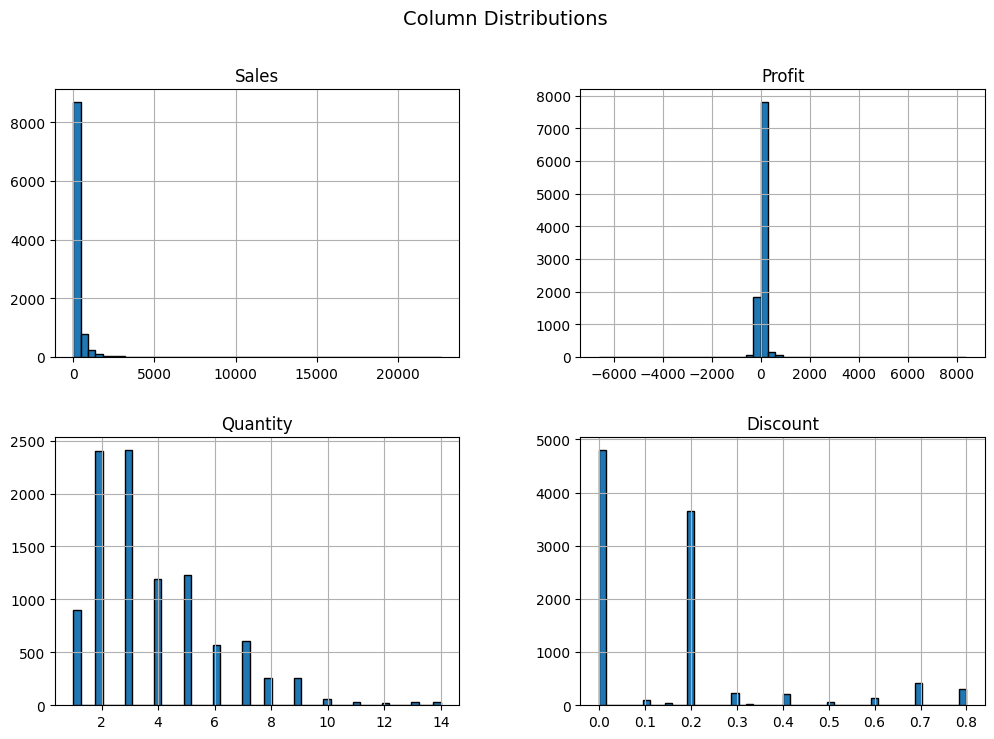

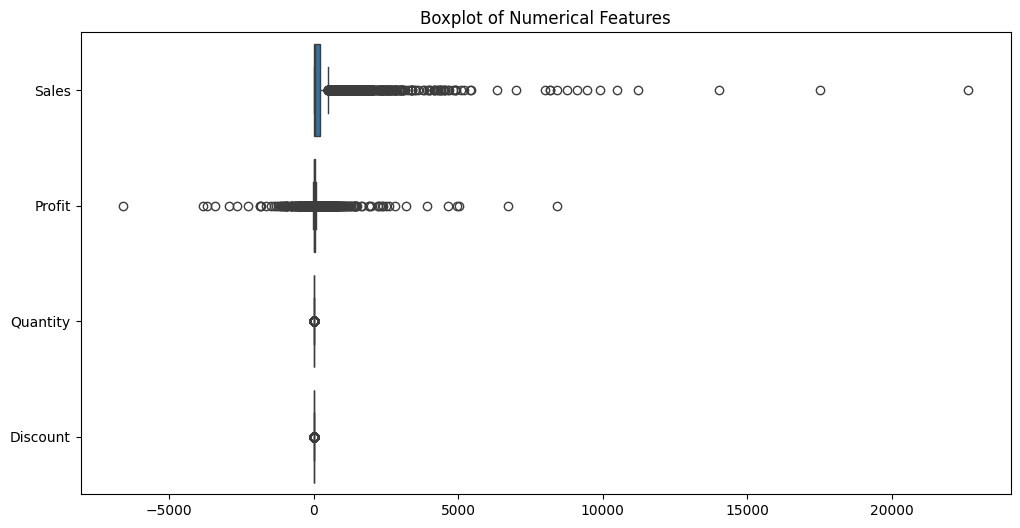

In [42]:
# Define numerical columns for distribution analysis
num_cols = ["Sales", "Profit", "Quantity", "Discount"]

# Histograms for numerical column distributions
df[num_cols].hist(figsize=(12, 8), bins=50, edgecolor="black")

plt.suptitle("Column Distributions", fontsize=14)
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols], orient="h")
plt.title("Boxplot of Numerical Features")
plt.show()

Categorical data

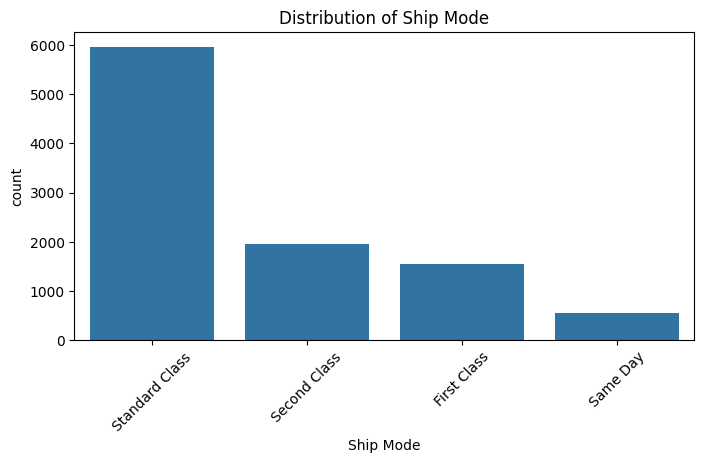

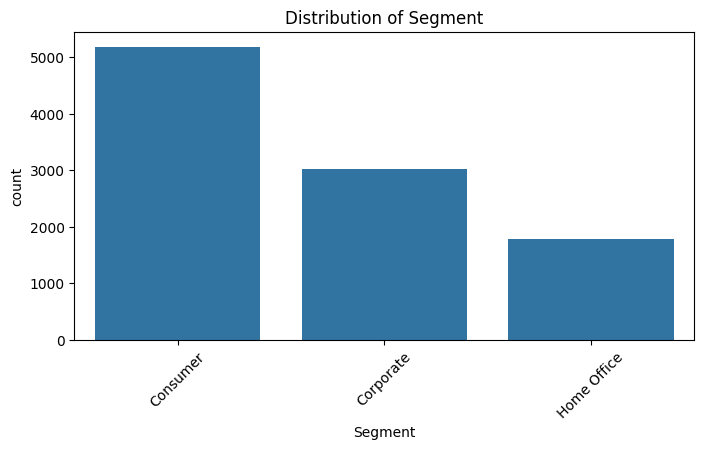

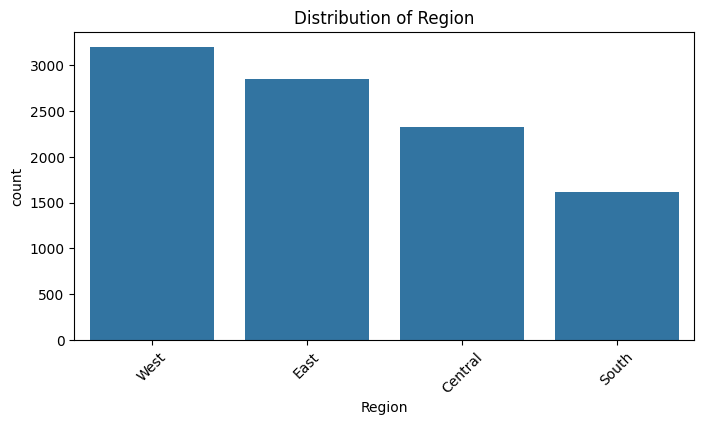

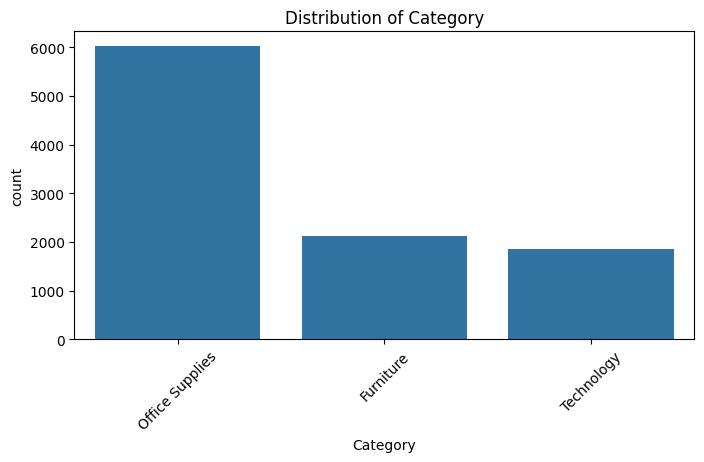

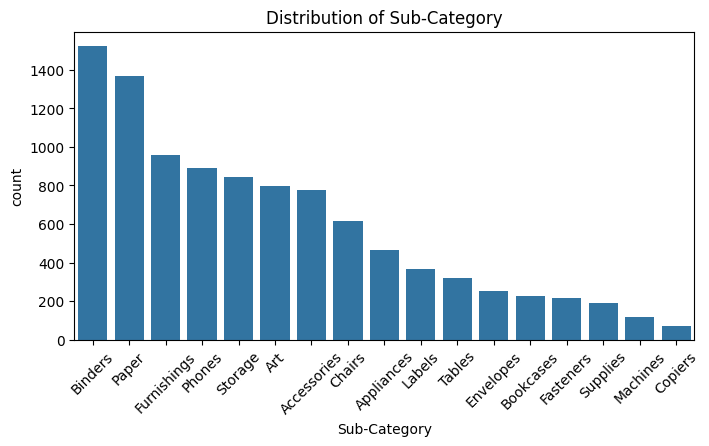

In [43]:
# List relevant categorical columns
categorical_cols = ["Ship Mode", "Segment", "Region", "Category", "Sub-Category"]

# Bar plots for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()

# Section 6

Correlation analysis

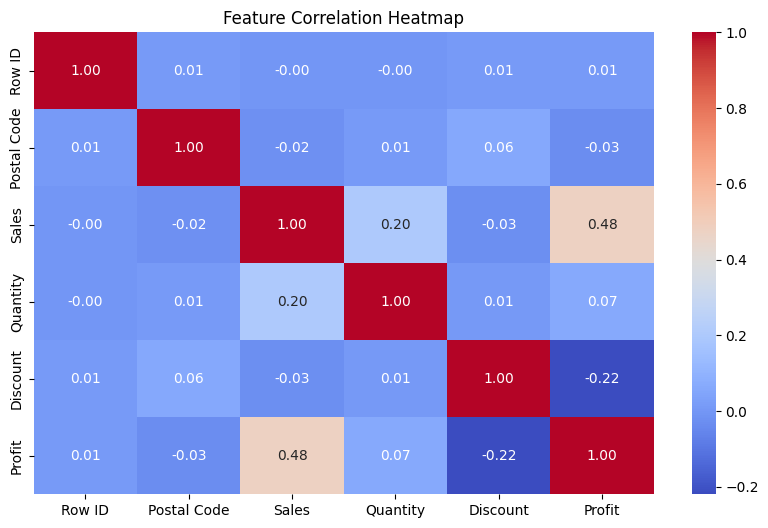

In [44]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Section 7

Initial findings

1. There are no missing values or duplicated rows in the dataset.
2. Order date and ship date need to be converted to datetime format.
3. Profit, sales and discount require further investigation.
4. Discount may negatively impact profit

Next steps

1. Convert order date and ship date to datetime.
2. Remove unnecesary columns (Row ID, Customer name, Country, Product name, Postal code)
3. Handle outliers in numerical columns.
4. Standardise Sales and profit.
5. Make a new column for delivery time.
6. Compute profit margin (profit/sales) to compare profit margins across categories.


---